In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import classification_report, accuracy_score, f1_score
import itertools

In [2]:
#file_path = r"C:\Users\jens.nilsen\OneDrive - Bouvet Norge AS\Documents\GitHub\trfkaipoc\data_2022-2025.csv"
file_path = r"C:\Users\jens.nilsen\OneDrive - Bouvet Norge AS\Documents\GitHub\trfkaipoc\data_2022-2025_norge.csv"
df = pd.read_csv(file_path, sep=";")
df = df[df["EGS.VEDTAK.10670"].notna()]
df['Avslag_ind'] = df['EGS.VEDTAK.10670'].apply(lambda x: 1 if x == "Avslag" else 0)
if "Kurvatur, horisontalelement" in df.columns:
    df["Kurvatur, horisontal"] = df["Kurvatur, horisontalelement"]
features = [
    'Avslag_ind',
    "ÅDT, total",
    "ÅDT, andel lange kjøretøy",
    "Fartsgrense",
    "Avkjørsel, holdningsklasse",
    "Funksjonsklasse",
    "Avkjørsler",
    "Trafikkulykker",
    "EGS.BRUKSOMRÅDE.1256", 
    "Kurvatur, horisontal", 
    "Kurvatur, stigning"
]
X=df[features]

In [3]:
y = X['Avslag_ind']        # target
X = X.drop(columns=['Avslag_ind'])  # all other columns
X.shape

(930, 10)

In [4]:
catfeatures=["Avkjørsel, holdningsklasse", "Funksjonsklasse", "EGS.BRUKSOMRÅDE.1256"]

In [5]:
X_cat=X[catfeatures]

In [6]:
X_cat

,"Avkjørsel, holdningsklasse",Funksjonsklasse,EGS.BRUKSOMRÅDE.1256
0,Lite streng,E - Lokale adkomstveger,Bolig
1,Lite streng,E - Lokale adkomstveger,Bolig
2,Mindre streng,D - Lokale samleveger,Bolig
3,Meget streng,C - Lokale hovedveger,Industri
4,Lite streng,D - Lokale samleveger,Bolig
...,...,...,...
925,Lite streng,E - Lokale adkomstveger,Bolig
926,Mindre streng,D - Lokale samleveger,Gardsbruk
927,Streng,C - Lokale hovedveger,Bolig
928,Streng,B - Regionale hovedveger,Skog/skogbruk


In [7]:
X_cat

,"Avkjørsel, holdningsklasse",Funksjonsklasse,EGS.BRUKSOMRÅDE.1256
0,Lite streng,E - Lokale adkomstveger,Bolig
1,Lite streng,E - Lokale adkomstveger,Bolig
2,Mindre streng,D - Lokale samleveger,Bolig
3,Meget streng,C - Lokale hovedveger,Industri
4,Lite streng,D - Lokale samleveger,Bolig
...,...,...,...
925,Lite streng,E - Lokale adkomstveger,Bolig
926,Mindre streng,D - Lokale samleveger,Gardsbruk
927,Streng,C - Lokale hovedveger,Bolig
928,Streng,B - Regionale hovedveger,Skog/skogbruk


C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_24100\1763470772.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_y.values, y=mean_y.index, palette="viridis")


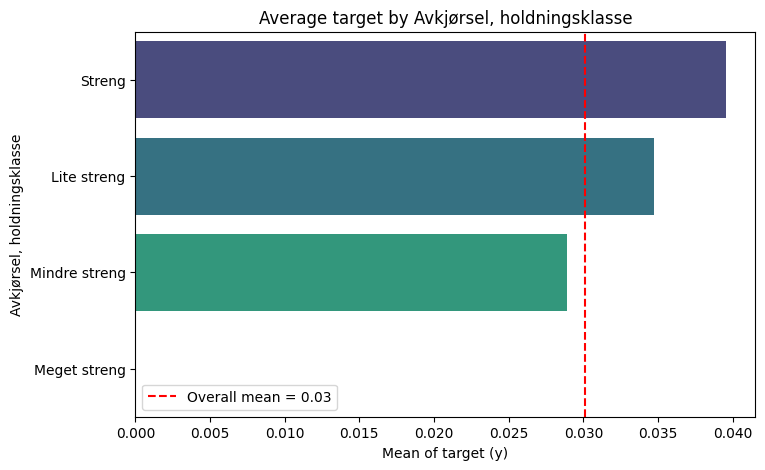

C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_24100\1763470772.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_y.values, y=mean_y.index, palette="viridis")


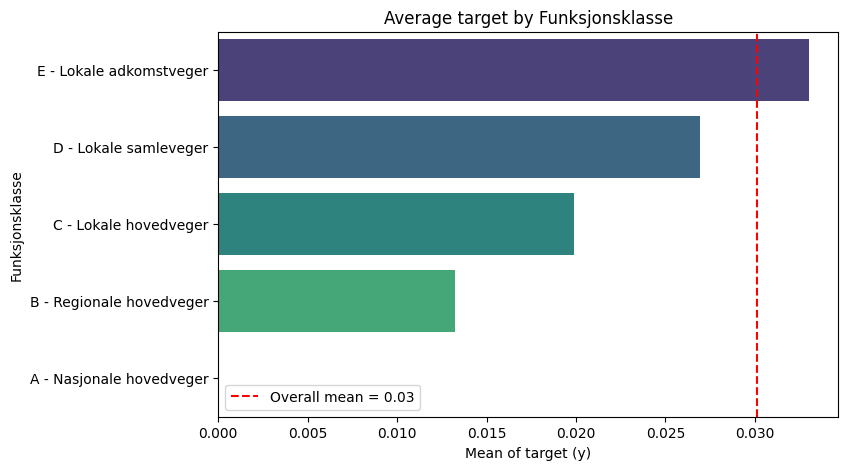

C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_24100\1763470772.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_y.values, y=mean_y.index, palette="viridis")


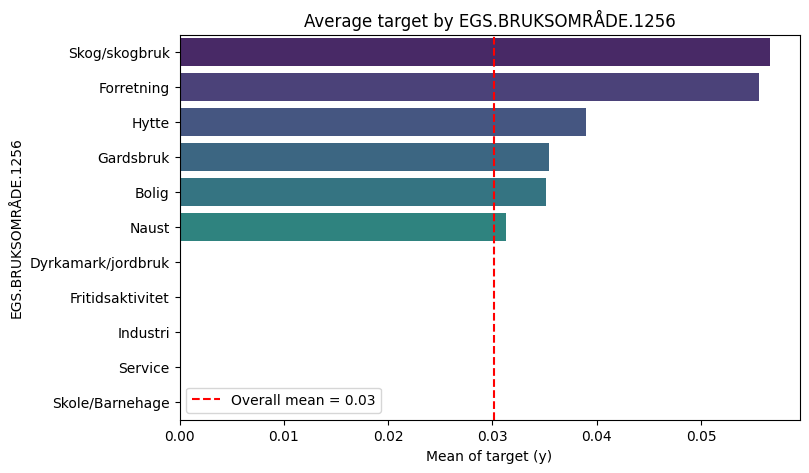

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ["Avkjørsel, holdningsklasse", "Funksjonsklasse", "EGS.BRUKSOMRÅDE.1256"]
overall_mean = y.mean()  # overall average of y

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    
    # Compute mean of y per category
    mean_y = y.groupby(X[col]).mean().sort_values(ascending=False)
    
    # Bar plot
    sns.barplot(x=mean_y.values, y=mean_y.index, palette="viridis")
    
    # Add horizontal line for overall mean
    plt.axvline(overall_mean, color='red', linestyle='--', label=f"Overall mean = {overall_mean:.2f}")
    
    plt.xlabel("Mean of target (y)")
    plt.ylabel(col)
    plt.title(f"Average target by {col}")
    plt.legend()
    plt.show()


C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_24100\3733327837.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_y.values, y=mean_y.index, palette="viridis")


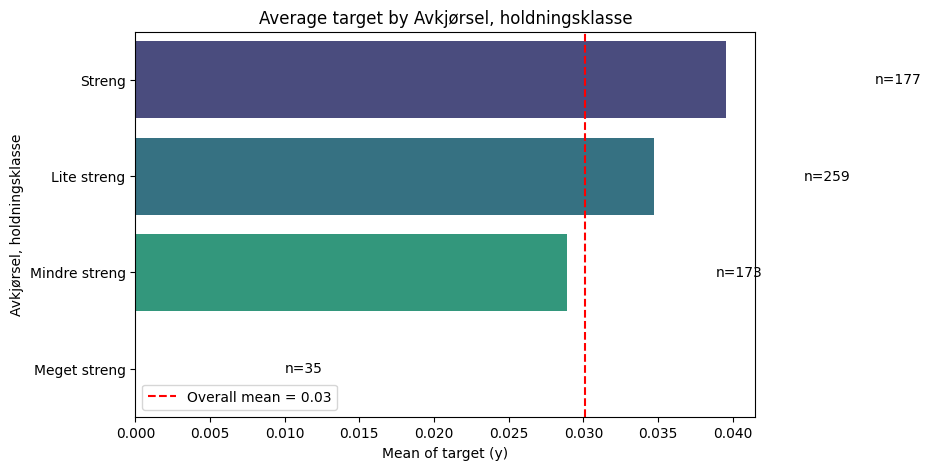

C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_24100\3733327837.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_y.values, y=mean_y.index, palette="viridis")


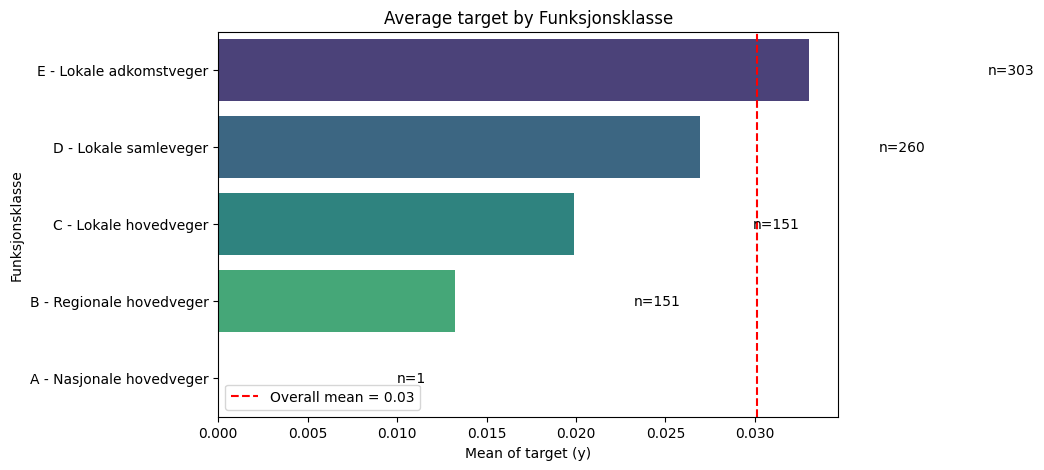

C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_24100\3733327837.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_y.values, y=mean_y.index, palette="viridis")


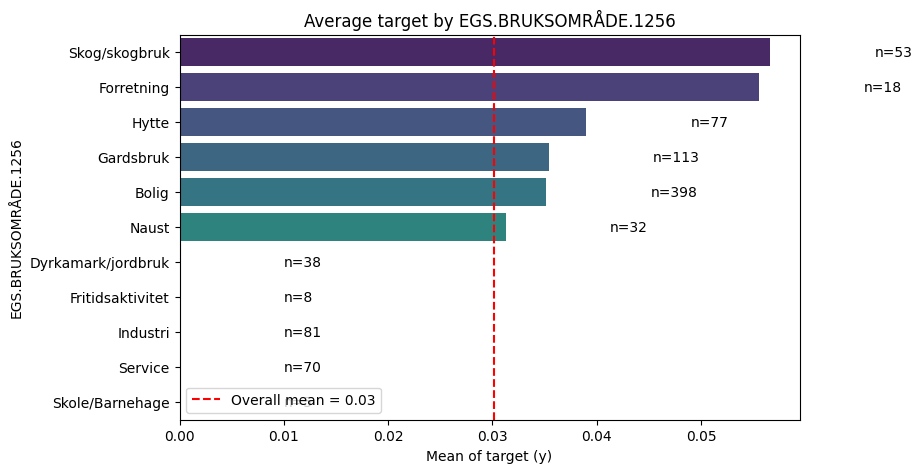

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ["Avkjørsel, holdningsklasse", "Funksjonsklasse", "EGS.BRUKSOMRÅDE.1256"]
overall_mean = y.mean()  # overall average of y

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    
    # Compute mean of y per category
    mean_y = y.groupby(X[col]).mean().sort_values(ascending=False)
    # Compute counts per category
    counts = X[col].value_counts().reindex(mean_y.index)
    
    # Bar plot
    sns.barplot(x=mean_y.values, y=mean_y.index, palette="viridis")
    
    # Add overall mean line
    plt.axvline(overall_mean, color='red', linestyle='--', label=f"Overall mean = {overall_mean:.2f}")
    
    # Annotate bars with sample counts
    for i, cat in enumerate(mean_y.index):
        plt.text(mean_y[cat] + 0.01, i, f"n={counts[cat]}", va='center')
    
    plt.xlabel("Mean of target (y)")
    plt.ylabel(col)
    plt.title(f"Average target by {col}")
    plt.legend()
    plt.show()


In [11]:
from scipy.stats import chi2_contingency
import pandas as pd

categorical_cols = ["Avkjørsel, holdningsklasse", "Funksjonsklasse", "EGS.BRUKSOMRÅDE.1256"]

for col in categorical_cols:
    # Build contingency table
    contingency = pd.crosstab(X[col], y)
    
    # Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency)
    
    print(f"{col}: chi2={chi2:.2f}, p-value={p:.4f}, dof={dof}")
    if p < 0.05:
        print(f"  → Statistically significant difference in y across categories!\n")
    else:
        print(f"  → No statistically significant difference.\n")


Avkjørsel, holdningsklasse: chi2=1.56, p-value=0.6678, dof=3
  → No statistically significant difference.

Funksjonsklasse: chi2=1.85, p-value=0.7641, dof=4
  → No statistically significant difference.

EGS.BRUKSOMRÅDE.1256: chi2=8.86, p-value=0.5451, dof=10
  → No statistically significant difference.



C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_24100\2348984891.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_y.values, y=mean_y.index, palette="viridis")


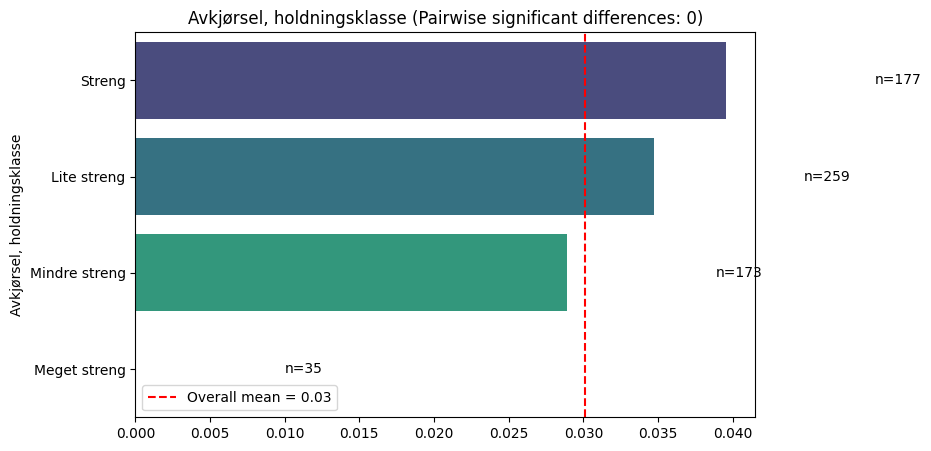

No significant pairwise differences for Avkjørsel, holdningsklasse.



C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_24100\2348984891.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_y.values, y=mean_y.index, palette="viridis")


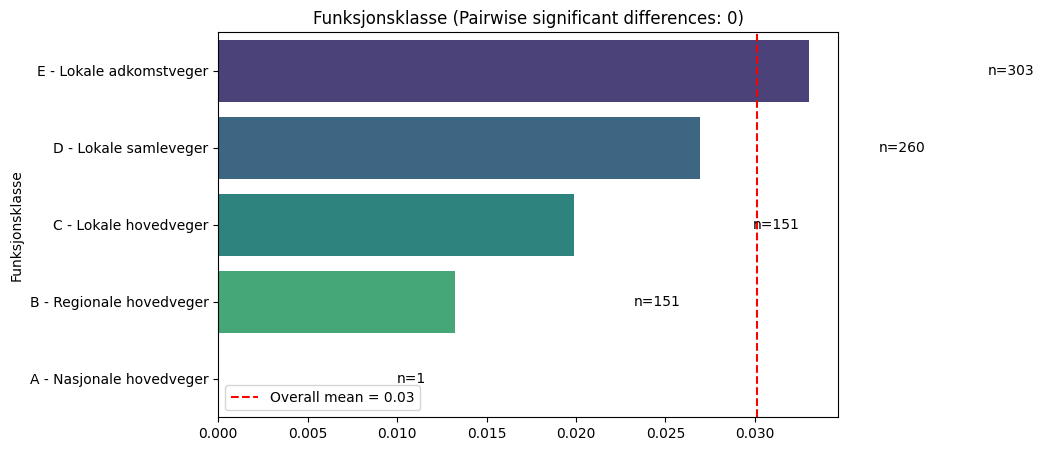

No significant pairwise differences for Funksjonsklasse.



C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_24100\2348984891.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_y.values, y=mean_y.index, palette="viridis")
C:\Users\jens.nilsen\python\WPy64-31230\python-3.12.3.amd64\Lib\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


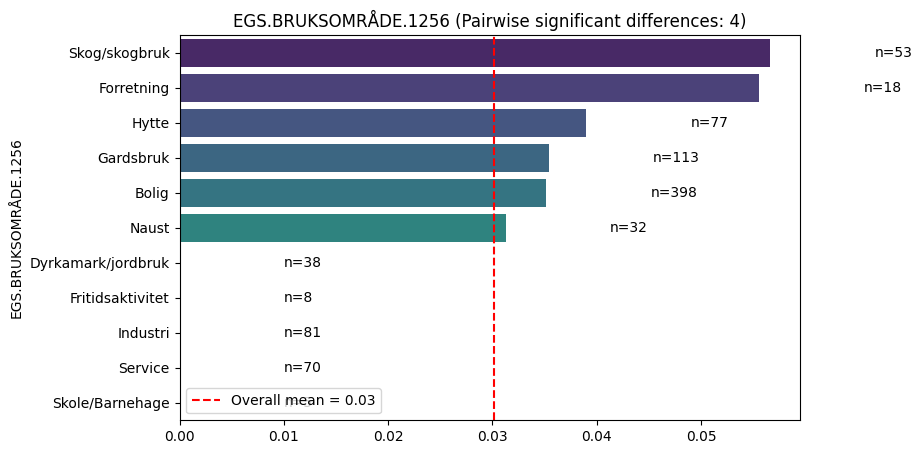

Significant pairwise differences for EGS.BRUKSOMRÅDE.1256:
  Skog/skogbruk vs Industri: p=0.0303
  Skog/skogbruk vs Service: p=0.0439
  Forretning vs Industri: p=0.0330
  Forretning vs Service: p=0.0473


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from itertools import combinations

categorical_cols = ["Avkjørsel, holdningsklasse", "Funksjonsklasse", "EGS.BRUKSOMRÅDE.1256"]
overall_mean = y.mean()

for col in categorical_cols:
    # Compute mean and counts per category
    mean_y = y.groupby(X[col]).mean().sort_values(ascending=False)
    counts = X[col].value_counts().reindex(mean_y.index)
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=mean_y.values, y=mean_y.index, palette="viridis")
    plt.axvline(overall_mean, color='red', linestyle='--', label=f"Overall mean = {overall_mean:.2f}")
    
    # Annotate bars with counts
    for i, cat in enumerate(mean_y.index):
        plt.text(mean_y[cat] + 0.01, i, f"n={counts[cat]}", va='center')
    
    # Pairwise comparisons
    sig_pairs = []
    cats = mean_y.index.tolist()
    for cat1, cat2 in combinations(cats, 2):
        count = np.array([y[X[col]==cat1].sum(), y[X[col]==cat2].sum()])
        nobs = np.array([counts[cat1], counts[cat2]])
        stat, pval = proportions_ztest(count, nobs)
        if pval < 0.05:
            sig_pairs.append((cat1, cat2, pval))
    
    # Add title including number of significant pairwise differences
    plt.title(f"{col} (Pairwise significant differences: {len(sig_pairs)})")
    plt.legend()
    plt.show()
    
    # Print significant pairs
    if sig_pairs:
        print(f"Significant pairwise differences for {col}:")
        for cat1, cat2, pval in sig_pairs:
            print(f"  {cat1} vs {cat2}: p={pval:.4f}")
    else:
        print(f"No significant pairwise differences for {col}.\n")
